<h1 align="center"><b>Model Evaluation and Improvement</b></h1>

# old way

In [199]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a traing and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and ift it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print(f"Test set score: {logreg.score(X_test, y_test)}")

Test set score: 0.88


# <b>Cross-Validation

## Cross-Validation in scikit-learn

In [200]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print(f"Cross-validation score: {scores}")

Cross-validation score: [0.98 0.96 0.98]


/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [201]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print(f"Cross-validation score {scores}")

Cross-validation score [0.96666667 1.         0.93333333 0.96666667 1.        ]


/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [202]:
print(f"Avarage cross-validation score: {scores.mean():.2f}")

Avarage cross-validation score: 0.97


## Benefits of Cross-validation

There are several benefits to using cross-validation instead of a single split into a
training and a test set. First, remember that train_test_split performs a random
split of the data. Imagine that we are “lucky” when randomly splitting the data, and
all examples that are hard to classify end up in the training set. In that case, the test
set will only contain “easy” examples, and our test set accuracy will be unrealistically
high. Conversely, if we are “unlucky,” we might have randomly put all the hard-toclassify
examples in the test set and consequently obtain an unrealistically low score.
However, when using cross-validation, each example will be in the training set exactly
once: each example is in one of the folds, and each fold is the test set once. Therefore,
the model needs to generalize well to all of the samples in the dataset for all of the
cross-validation scores (and their mean) to be high.
Having multiple splits of the data also provides some information about how sensitive
our model is to the selection of the training dataset. For the iris dataset, we saw
accuracies between 90% and 100%. This is quite a range, and it provides us with an
idea about how the model might perform in the worst case and best case scenarios
when applied to new data.
Another benefit of cross-validation as compared to using a single split of the data is
that we use our data more effectively. When using train_test_split, we usually use
75% of the data for training and 25% of the data for evaluation. When using five-fold
cross-validation, in each iteration we can use four-fifths of the data (80%) to fit the
model. When using 10-fold cross-validation, we can use nine-tenths of the data
(90%) to fit the model. More data will usually result in more accurate models.
The main disadvantage of cross-validation is increased computational cost. As we are
now training k models instead of a single model, cross-validation will be roughly k
times slower than doing a single split of the data.

In [203]:
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import time

X, y = fetch_covtype(return_X_y=True)

model = RandomForestClassifier(n_estimators=100, n_jobs=-1)

start = time.time()
scores = cross_val_score(model, X, y, cv=5)
end = time.time()

print("CV scores:", scores)
print("Total time:", round(end - start, 2), "seconds")


CV scores: [0.62812492 0.55659492 0.54889761 0.59860415 0.6371491 ]
Total time: 152.84 seconds


## Stratified k-Fold Cross-Validationn and Other Strategies

In [204]:
from sklearn.datasets import load_iris

iris = load_iris()
print(f"Iris Labes:\n{iris.target}")

Iris Labes:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


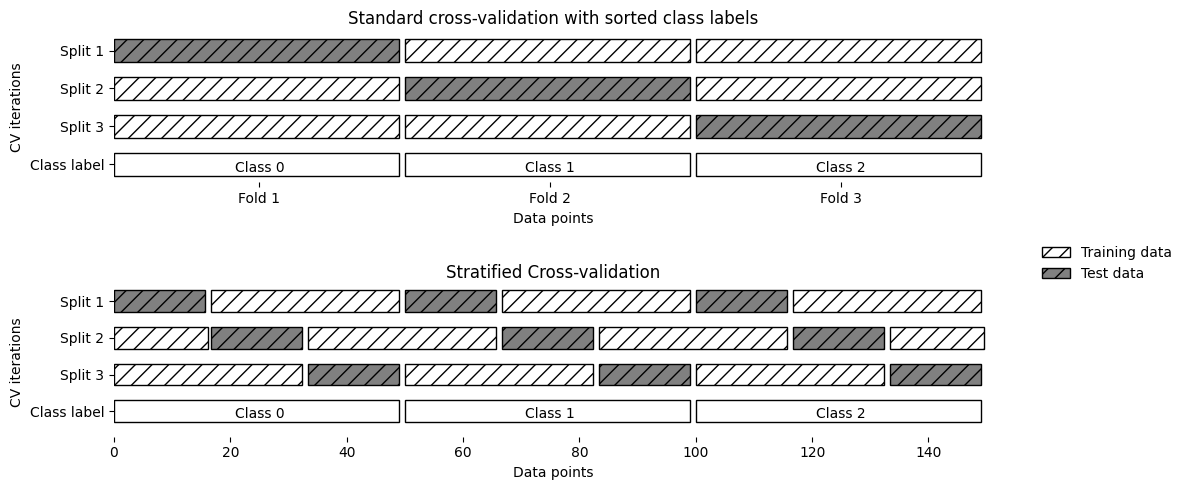

In [205]:
import mglearn
mglearn.plots.plot_stratified_cross_validation()

### More control over cross-validation

In [206]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [207]:
print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data,iris.target, cv=kfold)}")

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [208]:
kfold = KFold(n_splits=3)
print(f"Cross-validation score:\n{cross_val_score(logreg, iris.data, iris.target, cv = kfold)}")

Cross-validation score:
[0. 0. 0.]


In [209]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross-validation scores:
[0.98 0.96 0.96]


### Leave-one-out cross-validation

In [210]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print(f"\n\nNumber of cv interactions: {len(scores)}")
print(f"mean accuracy: {scores.mean():.2f}\n\n")

/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproc



Number of cv interactions: 150
mean accuracy: 0.97




/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Shuffle-split cross-validation

In [211]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5,n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print(f"Cross-validation scores:\n{scores}")

Cross-validation scores:
[0.98666667 0.97333333 0.96       0.94666667 0.94666667 1.
 1.         0.93333333 0.93333333 0.94666667]


In [212]:
from sklearn.model_selection import StratifiedShuffleSplit
s_shuffle_split = StratifiedShuffleSplit(train_size=.5, test_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = s_shuffle_split)
print(scores.mean())

0.9573333333333334


/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Cross-validation with groups

In [213]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
#assume the first threee samples belong to the same group,
# hen the next four etc
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print(f"cross_val_score:\n{scores}")

cross_val_score:
[0.75       0.6        0.66666667]


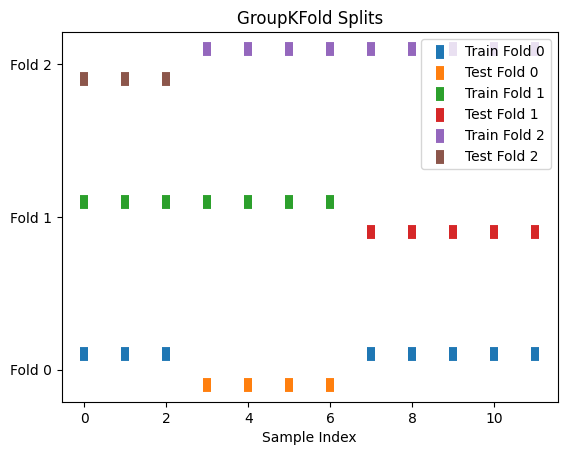

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold

groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
X = np.ones((12, 10))  # dummy features
y = np.ones(12)        # dummy labels

cv = GroupKFold(n_splits=3)

fig, ax = plt.subplots()
for fold, (train, test) in enumerate(cv.split(X, y, groups=groups)):
    ax.scatter(train, [fold + 0.1]*len(train), label=f"Train Fold {fold}", marker='_', lw=10)
    ax.scatter(test, [fold - 0.1]*len(test), label=f"Test Fold {fold}", marker='_', lw=10)

ax.set_yticks([0, 1, 2])
ax.set_yticklabels(["Fold 0", "Fold 1", "Fold 2"])
ax.set_xlabel("Sample Index")
ax.set_title("GroupKFold Splits")
ax.legend()
plt.show()


# Grid Search

## Simple Grid Search

In [215]:
# naive grid search implementation
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(f"Size of training set: {X_train.shape[0]}   size of test set: {X_test.shape[0]}")

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=c)
        svm.fit(X_train, y_train)
        # evaluate the SVC  on the test set
        score = svm.score(X_test, y_test)
        # if we got better score, store the scores and parameters
        if score > best_score:
            best_score = score
            best_perameters = {'C': c, 'gamma':gamma}
        
print(f"Best score {best_score:.2f}")
print(f"Best parameters: {best_perameters}")

Size of training set: 112   size of test set: 38
Best score 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


## the Danger of Overfitting the Parameters and the Validation Set

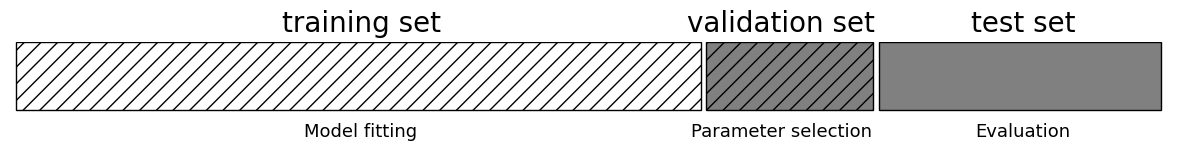

In [216]:
mglearn.plots.plot_threefold_split()

In [217]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# split train+validation set into trainig and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print(f"Size of training set: {X_train.shape[0]}, size of validation set: {X_valid.shape[0]}, "
      f"size of test set: {X_test.shape[0]}\n")

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train on SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        #evaluate the svc on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_perameters = {'C':C, 'gamma':gamma}
        
# rebuild a model on the combined training and validation set
# and evaluate it on the test set
svm = SVC(**best_perameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print(f"Best score on validation set: {best_score:.2f}")
print(f"Best parameters: {best_perameters}")
print(f"Test set score with best parametrs: {test_score:.2f}")


Size of training set: 84, size of validation set: 28, size of test set: 38

Best score on validation set: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parametrs: 0.92


## Grid Search with Cross-validation

In [218]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train on SVC
        svm = SVC(gamma=gamma, C=C)
        # perfom cross-validaton
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        # if we got better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_perameters = {'C': C, 'gamma': gamma}

# rebuild a model on the comined training and validation set
svm = SVC(**best_perameters)
svm.fit(X_trainval, y_trainval)
print(f"parameters: {best_perameters}")
print(f"final score: {svm.score(X_test, y_test)}")


parameters: {'C': 10, 'gamma': 0.1}
final score: 0.9736842105263158


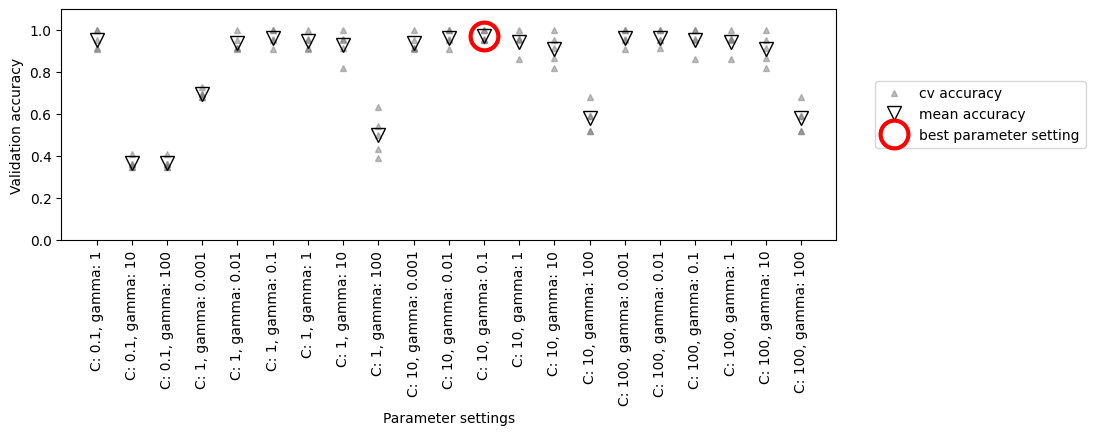

In [219]:
mglearn.plots.plot_cross_val_selection()

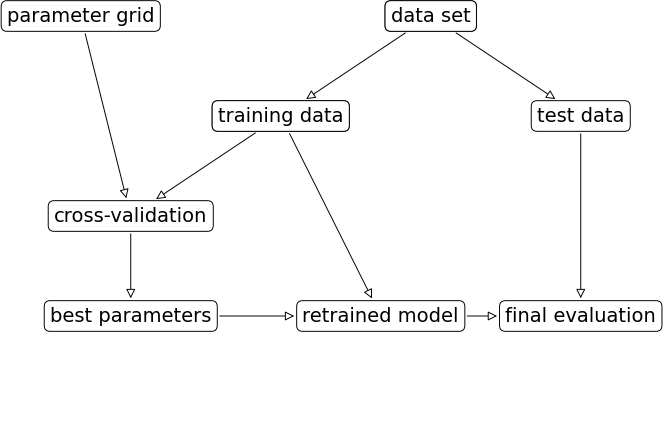

In [220]:
mglearn.plots.plot_grid_search_overview()

In [221]:
param_grid = {'C': [0.001,0.01,0.1,1,10,100],
              'gamma':[0.001,0.01,0.1,1,10,100]}
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [224]:
grid_search.fit(X_train,y_train)

FileNotFoundError: [Errno 2] No such file or directory: '/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/utils/_repr_html/estimator.js'

FileNotFoundError: [Errno 2] No such file or directory: '/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/utils/_repr_html/estimator.js'

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [225]:
print(f"Test set score: {grid_search.score(X_test, y_test)}")

Test set score: 0.9736842105263158


In [226]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.9731225296442687


In [227]:
print(f"Best estimator:\n{grid_search.best_estimator_}")

Best estimator:
SVC(C=10, gamma=0.1)


### Analyzing the result of cross-validation

In [228]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000785,0.000196,0.000516,0.000147,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000612,0.000025,0.000381,0.000017,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000649,0.000039,0.000389,0.000024,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000600,0.000020,0.000400,0.000033,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000700,0.000132,0.000402,0.000047,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


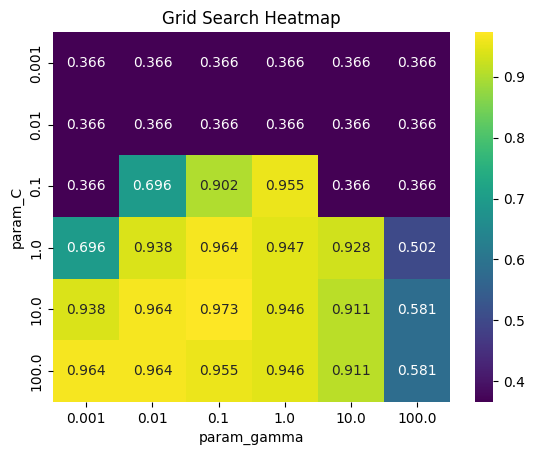

In [229]:
import seaborn as sns
pivot = results.pivot(index="param_C", columns="param_gamma", values="mean_test_score")
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")
plt.title("Grid Search Heatmap")
plt.show()

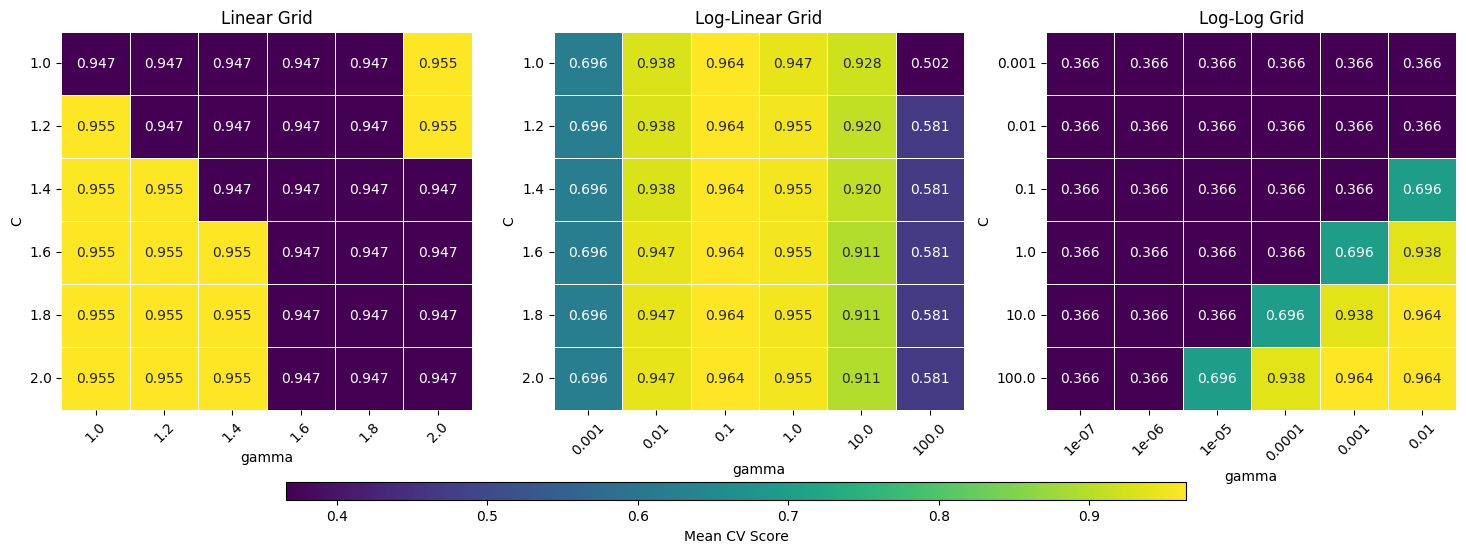

In [230]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

param_grid_linear = {
    'C': np.linspace(1, 2, 6),
    'gamma': np.linspace(1, 2, 6)
}

param_grid_log = {
    'C': np.linspace(1, 2, 6),
    'gamma': np.logspace(-3, 2, 6)
}

param_grid_range = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-7, -2, 6)
}

param_grids = [param_grid_linear, param_grid_log, param_grid_range]
titles = ['Linear Grid', 'Log-Linear Grid', 'Log-Log Grid']

heatmap_ref = None

for param_grid, ax, title in zip(param_grids, axes, titles):
    grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    results = pd.DataFrame(grid_search.cv_results_)
    pivot = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')
    
    heatmap_ref = sns.heatmap(
        pivot,
        annot=True,
        fmt=".3f",
        cmap="viridis",
        linewidths=0.5,
        cbar=False,
        ax=ax
    )
    
    ax.set_title(title)
    ax.set_xlabel("gamma")
    ax.set_ylabel("C")
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)


fig.subplots_adjust(bottom=0.25)  
cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.03])  
fig.colorbar(heatmap_ref.collections[0], cax=cbar_ax, orientation='horizontal', label='Mean CV Score')

plt.show()

### Search over spaces that are not grids

In [231]:
param_grid = [{'kernel':['rbf'],
               'C':[0.001,0.01,0.1, 1,10,100],
               'gamma':[0.001,0.01,0.1,1,10,100]},
               {'kernel':['linear'],
                'C':[0.001,0.01,0.1,10,100]}]
print(f"List of grid:\n{param_grid}")

List of grid:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 10, 100]}]


In [232]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best perameters: {grid_search.best_params_}")
print(f"Best cross-validation score {grid_search.best_score_:.2f}")

Best perameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score 0.97


In [233]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
mean_fit_time,0.000751,0.000592,0.000693,0.000624,0.000581,0.000668,0.000559,0.000546,0.000586,0.000559,...,0.000387,0.000379,0.00047,0.000685,0.000705,0.000581,0.000459,0.000398,0.000377,0.000399
std_fit_time,0.000228,0.000044,0.000055,0.000024,0.000009,0.000089,0.000006,0.000004,0.000034,0.000004,...,0.000014,0.000006,0.000013,0.000024,0.000015,0.000143,0.000004,0.000003,0.00001,0.000039
mean_score_time,0.000455,0.000422,0.000433,0.000405,0.000361,0.000395,0.000352,0.000346,0.000373,0.000349,...,0.000258,0.000255,0.000279,0.000352,0.000355,0.000277,0.000277,0.000251,0.00024,0.000243
std_score_time,0.00012,0.000091,0.00004,0.000045,0.000009,0.000035,0.000006,0.000003,0.000028,0.000002,...,0.000003,0.000001,0.000004,0.000013,0.000003,0.000008,0.000024,0.000004,0.000001,0.000007
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100.0,100.0,100.0,100.0,100.0,0.001,0.01,0.1,10.0,100.0
param_gamma,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,...,0.01,0.1,1.0,10.0,100.0,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.913043,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,1.0,0.956522


### Using different cross-validation strategies with grid search

you can use ShuffleSplit or
StratifiedShuffleSplit with n_iter=1. This might be helpful for very large datasets,
or very slow models.

#### Nested cross-validation

In [234]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid=param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

Cross-validation scores: [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score: 0.97


In [235]:
def nested_cv(X, y, inner_cv, outer_cv, classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross validation
        best_params = []
        best_score = -np.inf
        # iterate over parameters
        for params in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = classifier(** params)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = params
        # build classifier on best parameters using outer training set
        clf = classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate 
        outer_scores. append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [236]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid=param_grid))
print("cross_val_score ", scores)
print(f"Avarage cross-val-score: {scores.mean():.2f}")

cross_val_score  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Avarage cross-val-score: 0.98


# Evaluation Metrics and Scoring

## Metric for Binary Classifcation

### Kind of errors

type-I error: false possitive
<br>type-II error: false negative

### Imbalanced datasets

In [237]:
from sklearn.datasets import load_digits

digits = load_digits()
y =( digits.target == 9)

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [238]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print(f"Unique predicted labels: {dummy_majority.score(X_test, y_test):.2f}")

Unique predicted labels: 0.90


In [239]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f"Test score: {tree.score(X_test, y_test):.2f}")

Test score: 0.92


In [240]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print(f"Dummy socore: {dummy.score(X_test, y_test):.2f}")

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f"logreg score: {logreg.score(X_test, y_test):.2f}")

Dummy socore: 0.90
logreg score: 0.98


/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion matrices

In [241]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix: \n", confusion)

confusion matrix: 
 [[402   1]
 [  6  41]]


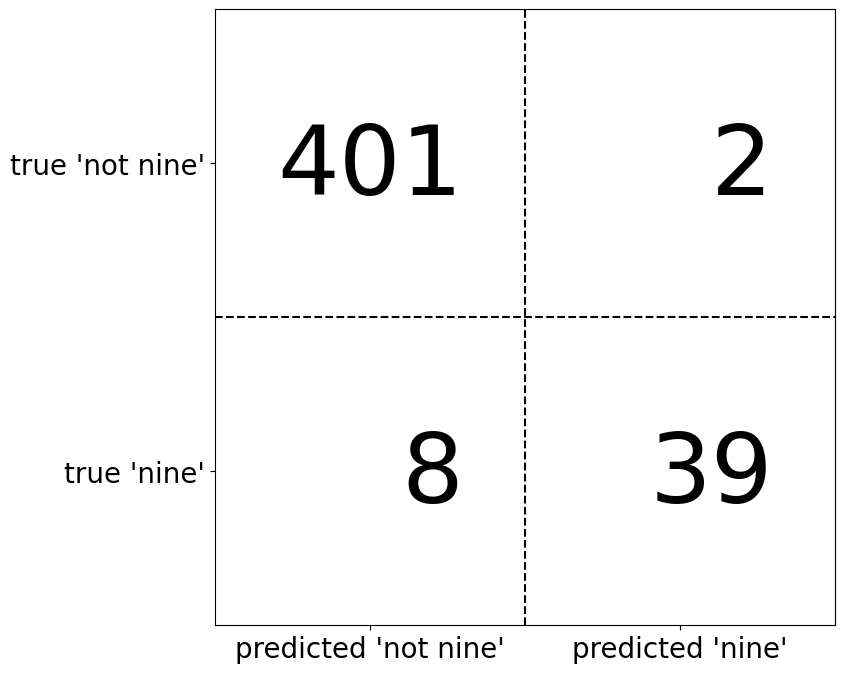

In [242]:
mglearn.plots.plot_confusion_matrix_illustration()

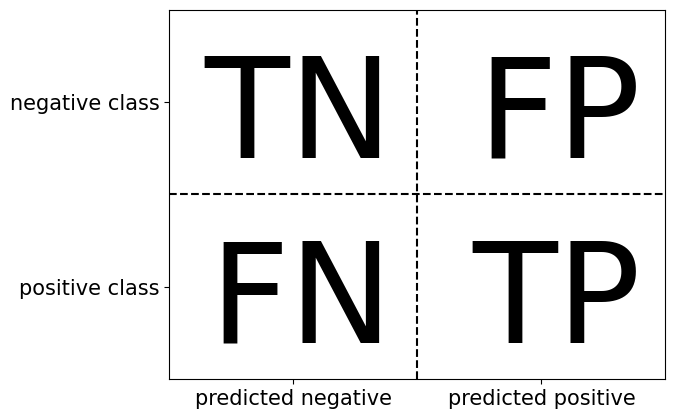

In [243]:
mglearn.plots.plot_binary_confusion_matrix()

In [244]:
print("Most frequent class")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model: ")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class
[[403   0]
 [ 47   0]]

Dummy model: 
[[403   0]
 [ 47   0]]

Decision tree
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


#### Relation to accuracy: 
$$
{Accuracy} = \frac{{TP} + {TN}}{{TP} + {TN} + {FP} + {FN}}
$$

### Precision, recal and f-score
$$
    Preccision = \frac{TP}{TP+FP}
$$
$$
    Recall = \frac{TP}{TP+FN}
$$
$$
    F = 2 \cdot \frac{precision \cdot recall}{precision+recall}
$$

In [245]:
from sklearn.metrics import f1_score
print(f"f1 score most frequent: {f1_score(y_test, pred_most_frequent):.2f}")
print(f"f1 score dummy: {f1_score(y_test, pred_dummy)}")
print(f"f1 score tree: {f1_score(y_test, pred_tree)}")
print(f"f1 score logistic regression: {f1_score(y_test, pred_logreg)}")

f1 score most frequent: 0.00
f1 score dummy: 0.0
f1 score tree: 0.5542168674698795
f1 score logistic regression: 0.9213483146067416


In [246]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

In [247]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

In [248]:
print(classification_report(y_test, pred_logreg, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



### Taking uncertainty into account

In [249]:
from mglearn.datasets import make_blobs
X,y = make_blobs(n_samples=(400, 50), centers=[[-5, 0], [6, 1]], cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

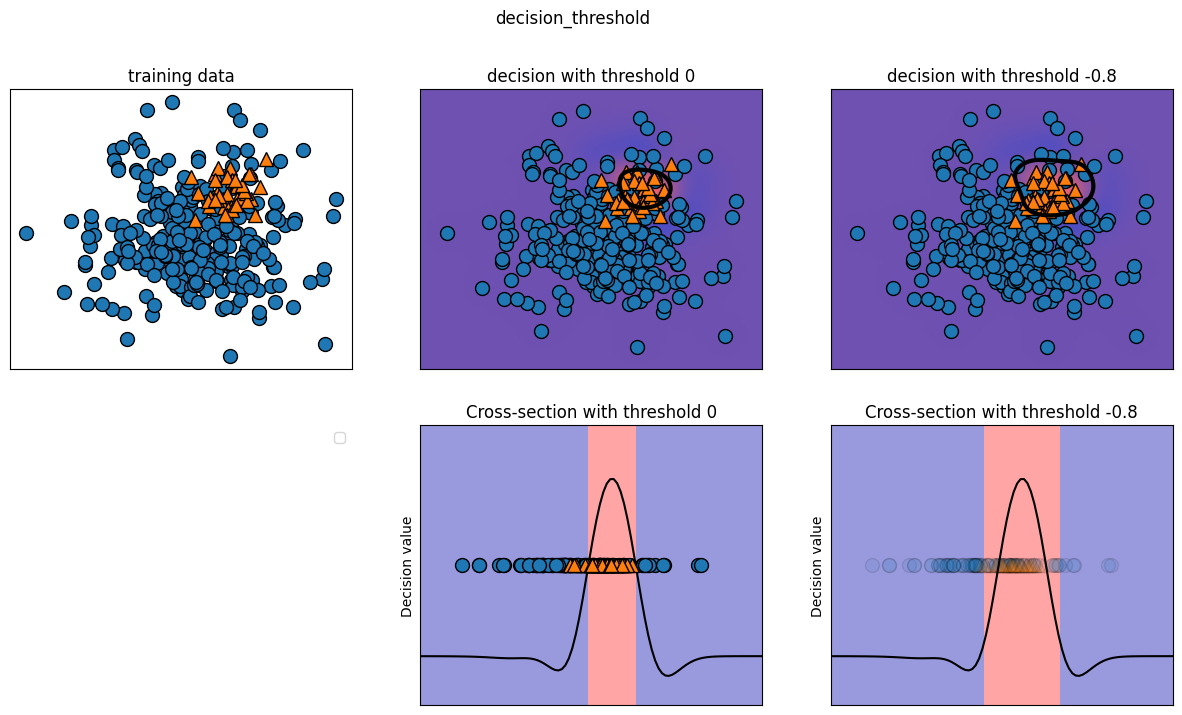

In [250]:
mglearn.plots.plot_decision_threshold()

In [251]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        96
           1       0.80      0.71      0.75        17

    accuracy                           0.93       113
   macro avg       0.87      0.84      0.85       113
weighted avg       0.93      0.93      0.93       113



In [252]:
y_pred_lower_threshold  = svc.decision_function(X_test) > -.8

In [253]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        96
           1       0.78      0.82      0.80        17

    accuracy                           0.94       113
   macro avg       0.87      0.89      0.88       113
weighted avg       0.94      0.94      0.94       113



In [254]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, svc.decision_function(X_test))

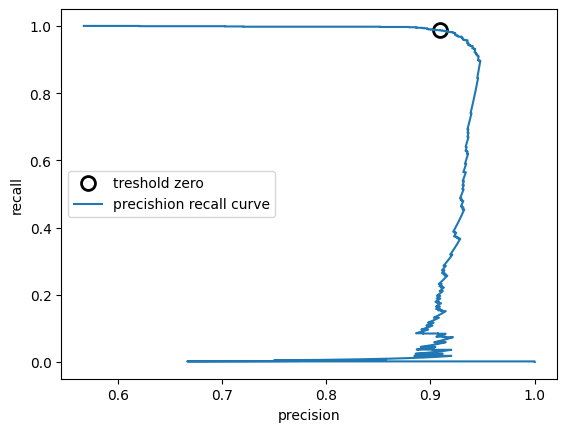

In [255]:
# use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 5000), centers=[[-5, 0], [5, 0]], cluster_std=[7.0, 2], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

#find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero + 1], recall[close_zero+1], 'o', markersize=10, label='treshold zero', fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='precishion recall curve')
plt.xlabel("precision")
plt.ylabel('recall')
plt.legend()

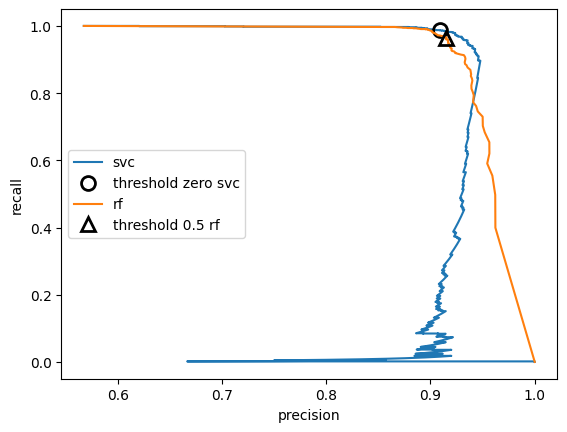

In [256]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o',
         markersize=10, label='threshold zero svc', fillstyle='none', c='k', mew=2)
plt.plot(precision_rf,recall_rf, label='rf')

close_default_rf = np.argmin(np.abs(threshold_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^',
         c='k', markersize=10, label='threshold 0.5 rf', fillstyle='none', mew=2)
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend()

In [257]:
print(f"f1_score of random forest: {f1_score(y_test, rf.predict(X_test)):.3f}")
print(f"f1_score of svc: {f1_score(y_test, svc.predict(X_test)):.3f}")

f1_score of random forest: 0.937
f1_score of svc: 0.947


### Receiver operationg characteristics (ROC) and AUC

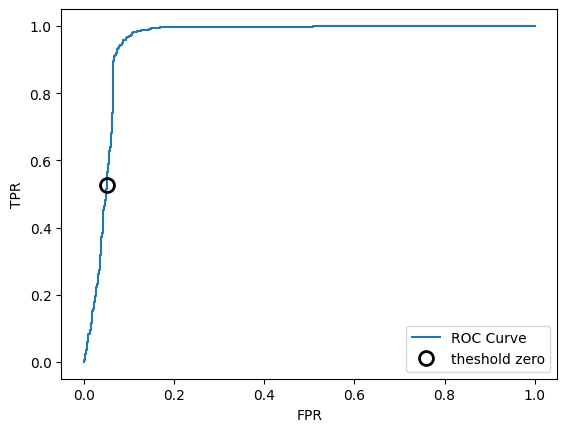

In [258]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel("FPR")
plt.ylabel("TPR")
# find threshold closest to zero
close_zero = np.argmin(np.abs(threshold))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='theshold zero', fillstyle='none', c='k', mew=2)
plt.legend()

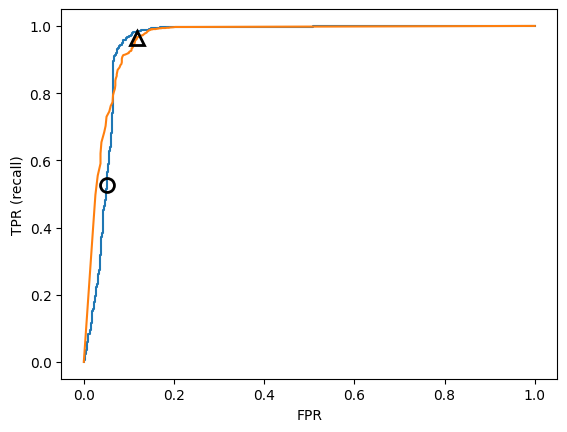

In [259]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, label="ROC Curve for SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve for RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero SVC', fillstyle='none', c='k', mew=2)
close_default_rf=np.argmin(np.abs(threshold_rf-0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label='threshold 0.5 RF', fillstyle='none', c = 'k', mew=2)

In [260]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print(F'AUC for Random Forest: {rf_auc:.3f}')
print(f"AUX for SVC: {svc_auc:.3f}")

AUC for Random Forest: 0.960
AUX for SVC: 0.951


gamma = 1.00    accuracy = 0.90    AUC = 0.50
gamma = 0.05    accuracy = 0.90    AUC = 1.00
gamma = 0.01    accuracy = 0.90    AUC = 1.00


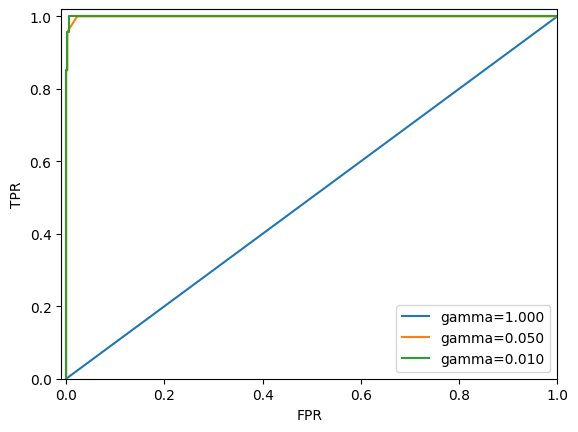

In [261]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print(f"gamma = {gamma:.2f}    accuracy = {accuracy:.2f}    AUC = {auc:.2f}")
    plt.plot(fpr, tpr, label=f"gamma={gamma:.3f}")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01,1)
plt.ylim(0, 1.02)
plt.legend()

### Metrcis for Multicalass classification

In [262]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, pred):.3f}")
print(f"confusion matrix:\n{confusion_matrix(y_test, pred)}")

accuracy: 0.951
confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


/opt/anaconda3/envs/ml-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


([<matplotlib.axis.XTick at 0x1640d02d0>,
 [Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, '')])

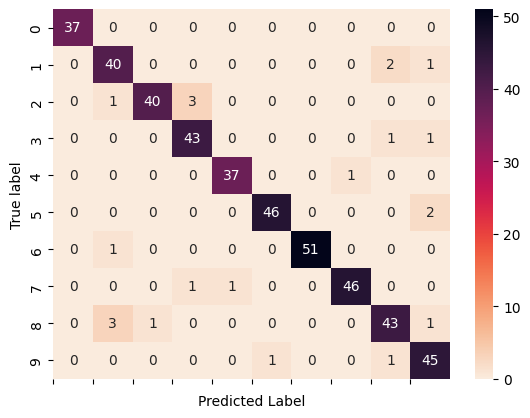

In [263]:
sns.heatmap(confusion_matrix(y_test, pred), cmap='rocket_r', fmt="d", annot=True)
plt.xlabel('Predicted Label')
plt.ylabel("True label")
plt.xticks(digits.target_names)

In [264]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [265]:
print(f"micro avarage f1 score:{f1_score(y_test,pred, average='micro'):.3f}")
print(f"macro average f1 score: {f1_score(y_test, pred, average='macro'):.3f}")
print(f"weighted avarage f1 score: {f1_score(y_test, pred, average='weighted'):.3f}")

micro avarage f1 score:0.951
macro average f1 score: 0.952
weighted avarage f1 score: 0.951


## Regression Metrics

Evaluation for regression can be done in similar detail as we did for classification—
for example, by analyzing overpredicting the target versus underpredicting the target.
However, in most applications we’ve seen, using the default R2 used in the score
method of all regressors is enough. Sometimes business decisions are made on the
basis of mean squared error or mean absolute error, which might give incentive to
tune models using these metrics. In general, though, we have found R2 to be a more
intuitive metric to evaluate regression models.

## Using Evaluation metrics in Model Selection

In [267]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

#we provided a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with acuracy")
print("Best parameters:", grid.best_params_)
print(f"Best cross-validation score (accuracy): {grid.best_score_}")
print(f"Tet set AUC: {roc_auc_score(y_test, grid.decision_function(X_test)):.3f}")
print(f"Test set accuracy: {grid.score(X_test, y_test)}")

Grid-Search with acuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy): 0.975500481894534
Tet set AUC: 0.992
Test set accuracy: 0.9733333333333334


In [268]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000
